# Exploratory Data Analysis - Kerala Rainfall

Kerala is a state in South India. This raw dataset has the monthly and annual rainfall in millimeters (mms) from the year 1901 to 2017.

## Outline

- Acquire dataset 
- First glance at data
- Data cleaning/manipulation
- Single variable analysis
- Multi-variable analysis
- Time-series visualization
- Finding patterns
- Making predictions

## Acquire dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
# Get csv data
df = pd.read_csv('Kerala-Rainfall-Historical.csv')

## First glance at Data

In [3]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


In [4]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,12.171795,15.374359,37.127350,109.419658,229.983761,653.164957,695.979487,420.692308,245.861538,291.941880,162.558974,39.980342,2914.247009,27.541026,376.515385,2015.688034,494.484615
std,33.919021,15.428164,16.127841,30.460281,45.169247,148.010937,186.222721,226.570097,159.340480,123.265815,95.056246,83.733559,36.819956,430.293104,22.222554,149.911887,388.179311,132.033245
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,1870.900000,0.300000,89.900000,1104.300000,166.600000
25%,1930.000000,2.400000,4.700000,18.100000,71.500000,124.500000,541.700000,532.000000,315.300000,150.100000,221.600000,92.900000,10.200000,2621.700000,10.300000,277.800000,1749.200000,406.500000
50%,1959.000000,6.000000,8.400000,28.300000,108.400000,190.600000,625.800000,687.300000,385.200000,223.900000,282.600000,153.000000,31.100000,2931.100000,20.500000,342.000000,1947.500000,500.800000
75%,1988.000000,16.900000,21.400000,50.100000,135.100000,265.400000,788.500000,831.600000,495.000000,335.600000,354.100000,219.100000,54.100000,3151.500000,40.600000,436.900000,2231.200000,584.000000
max,2017.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1199.200000,526.700000,567.900000,365.600000,202.300000,4257.800000,98.100000,915.200000,3451.300000,823.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  117 non-null    object 
 1   YEAR         117 non-null    int64  
 2   JAN          117 non-null    float64
 3   FEB          117 non-null    float64
 4   MAR          117 non-null    float64
 5   APR          117 non-null    float64
 6   MAY          117 non-null    float64
 7   JUN          117 non-null    float64
 8   JUL          117 non-null    float64
 9   AUG          117 non-null    float64
 10  SEP          117 non-null    float64
 11  OCT          117 non-null    float64
 12  NOV          117 non-null    float64
 13  DEC          117 non-null    float64
 14  ANNUAL       117 non-null    float64
 15  JF           117 non-null    float64
 16  MAM          117 non-null    float64
 17  JJAS         117 non-null    float64
 18  OND          117 non-null    float64
dtypes: float

Takeaway

- Year is its own column
- All months are their own columns and probably would be benefit from tidying
- Year and Month column will benefit from being converted into datetime object
- No missing data, but unclear if there are outliers yet
- Quick research reveals that JF, MAM, JJAS and OND columns represent groups of months:
    - JF : January-February
    - MAM : March-May
    - JJAS : June-September
    - OND : October-December
- Values JF, MAM, JJAS and OND months are used to conduct seasonal trend analysis in rainfall research papers and therefore is a useful information for simplyfying analysis. These columns will be reassigned as a separate dataframe with ANNUAL column.
- Summer months are receiving significantly more rainfall versus winter/spring 

## Data Cleaning/Manipulation

In [6]:
# Separaate columns for monthly and seaonal dataframes
df_monthly = df.drop(columns = ['ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'])
df_yearly = df[['SUBDIVISION', 'YEAR', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']]

In [7]:
# create a tidy dataset for easier manipulation
df_monthly = df_monthly.melt(id_vars = ['SUBDIVISION', 'YEAR'],\
                  value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],\
                  var_name = 'MONTH', value_name = 'VALUE')

In [8]:
# capitalize only the first letter of months in monthly data to easily combine and comvert them to datetime columns
df_monthly['MONTH'] = df_monthly['MONTH'].str.title()

In [9]:
# concatenate month and year column
df_monthly['YEAR'] = df_monthly['YEAR'].apply(str)
df_monthly['YEAR_MONTH'] = df_monthly['YEAR'] +'-'+ df_monthly['MONTH']
df_monthly['YEAR'] = df_monthly['YEAR'].apply(int)

In [10]:
# convert year-month column to datetime object
df_monthly['YEAR_MONTH'] = pd.to_datetime(df_monthly['YEAR_MONTH'], format='%Y-%b')

In [11]:
df_monthly.head()

,SUBDIVISION,YEAR,MONTH,VALUE,YEAR_MONTH
0,Kerala,1901,Jan,28.7,1901-01-01
1,Kerala,1902,Jan,6.7,1902-01-01
2,Kerala,1903,Jan,3.2,1903-01-01
3,Kerala,1904,Jan,23.7,1904-01-01
4,Kerala,1905,Jan,1.2,1905-01-01


In [12]:
# Create tidy dataset for yearly metric
df_yearly_tidy = df_yearly.melt(id_vars=['SUBDIVISION', 'YEAR'],\
                           value_vars=['ANNUAL', 'JF', 'MAM', 'JJAS','OND'],\
                           var_name='METRICS', value_name='VALUE')

In [13]:
df_yearly.head()

,SUBDIVISION,YEAR,ANNUAL,JF,MAM,JJAS,OND
0,Kerala,1901,3248.6,73.4,386.2,2122.8,666.1
1,Kerala,1902,3326.6,9.3,275.7,2403.4,638.2
2,Kerala,1903,3271.2,21.7,336.3,2343.0,570.1
3,Kerala,1904,3129.7,26.7,339.4,2398.2,365.3
4,Kerala,1905,2741.6,23.4,378.5,1881.5,458.1


## Single Variable Analysis

In [14]:
# Create a function for distribution function
def get_dist(data, var):
    plt.figure(figsize=(14,6))
    sns.histplot(x=data, kde=True)
    plt.title('Distribution of {}'.format(var))
    plt.xlabel('Rainfall in millimeters')

In [15]:
def get_ecdf(data, var):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/(len(x)+1)
    x_norm = np.sort(np.random.normal(data.mean(), data.std(), len(data)))

    plt.figure(figsize=(14,6))
    sns.scatterplot(x=x, y=y, label=var)
    sns.scatterplot(x=x_norm, y=y, label='Normal Distribution')
    plt.title('ECDF of {}'.format(var))

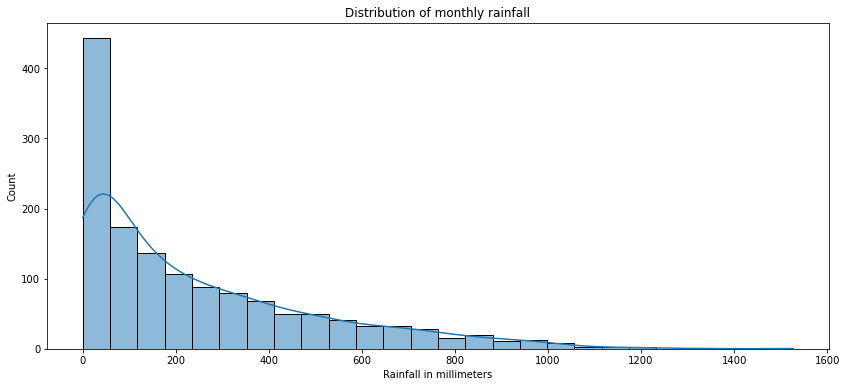

In [16]:
# Distribution of monthly rainfall
get_dist(df_monthly['VALUE'], 'monthly rainfall')

Did not expect the distribution of monthly rainfall to be normal as seasonal changes greatly influence the rainfall amount

Text(0, 0.5, 'Rainfall in millimeters (mms)')

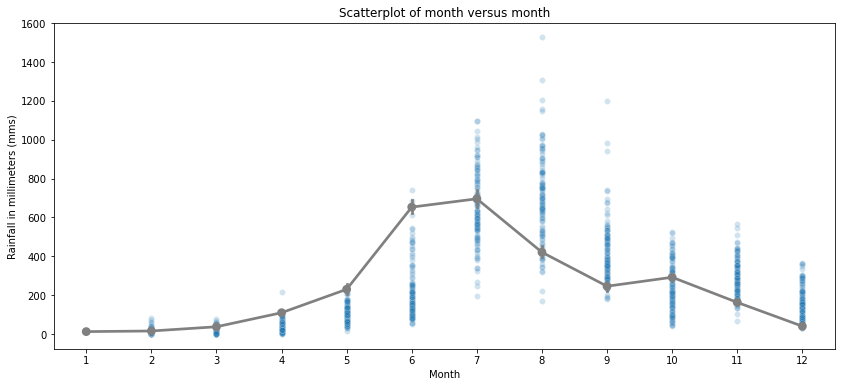

In [17]:
# Scatterplot of rainfall value versus month
plt.figure(figsize=(14,6))
sns.scatterplot(x=df_monthly['YEAR_MONTH'].dt.month, y=df_monthly['VALUE'], alpha=0.2)
sns.pointplot(x=df_monthly['YEAR_MONTH'].dt.month, y=df_monthly['VALUE'], color='gray')
plt.title('Scatterplot of month versus month')
plt.xlabel('Month')
plt.ylabel('Rainfall in millimeters (mms)')

There are some months with very little precipitation (12,1,2,3) versus high precipiation (6,7). 

Quick research reveals that Kerela often goes through the rainy monsoon, so this result if logical.

Text(0, 0.5, 'Rainfall in millimeters (mms)')

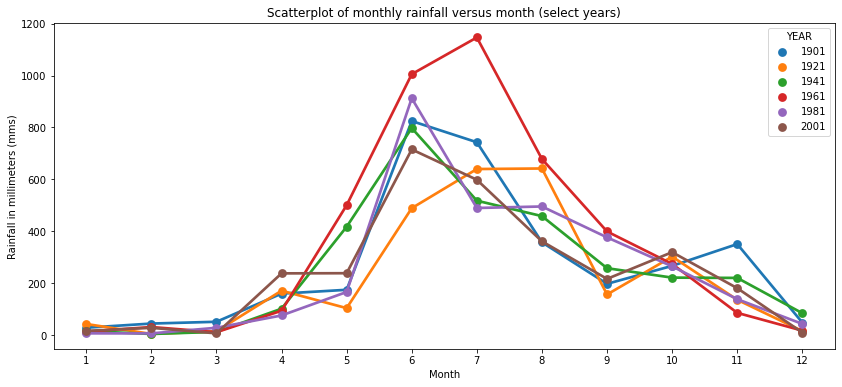

In [18]:
# There are too many years. Just graph select years to see if there are any yearly changes.
years = np.arange(1901, 2017, 20)
data = df_monthly[df_monthly['YEAR'].isin(years)]

plt.figure(figsize=(14,6))
# sns.scatterplot(x=data['YEAR_MONTH'].dt.month, y=data['VALUE'], hue=data['YEAR'])
sns.pointplot(x=data['YEAR_MONTH'].dt.month, y=data['VALUE'], hue=data['YEAR'])
plt.title('Scatterplot of monthly rainfall versus month (select years)')
plt.xlabel('Month')
plt.ylabel('Rainfall in millimeters (mms)')

It is hard to assess if there exists a decade by decade trend. This may be revisited.

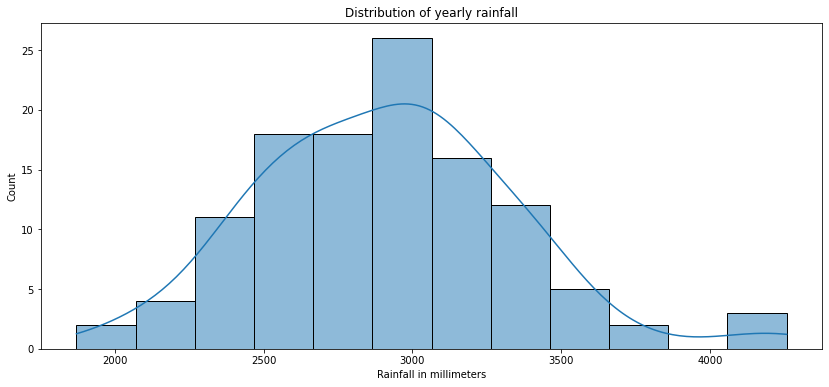

In [19]:
get_dist(df_yearly['ANNUAL'], 'yearly rainfall')

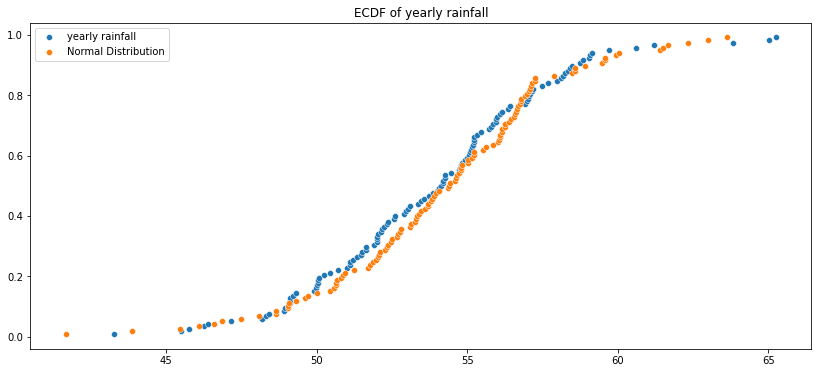

In [20]:
get_ecdf(df_yearly['ANNUAL']**0.5, 'yearly rainfall')

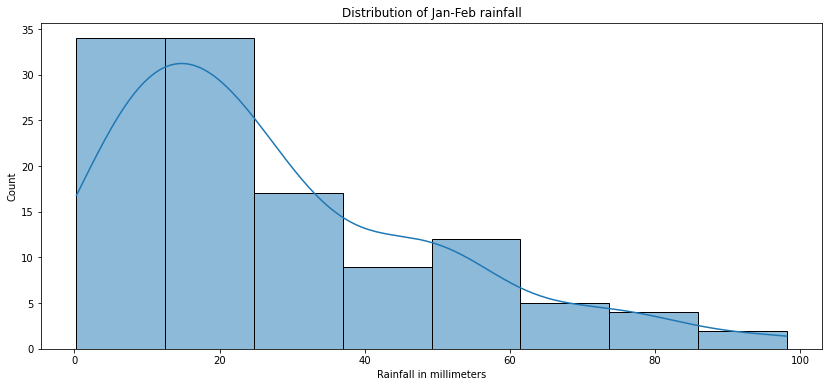

In [21]:
get_dist(df_yearly['JF'], 'Jan-Feb rainfall')

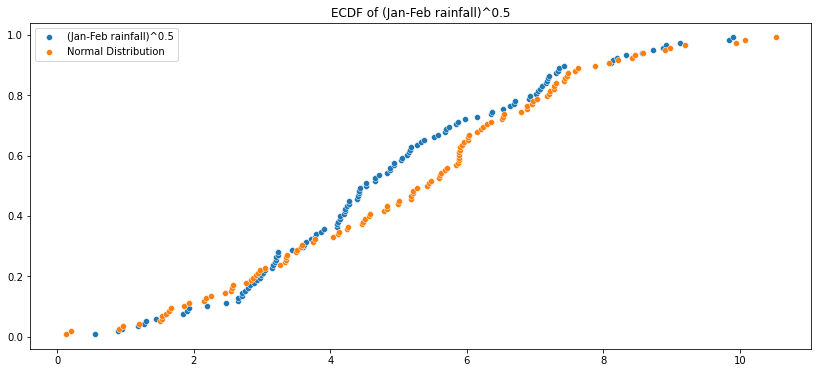

In [22]:
get_ecdf(df_yearly['JF']**0.5, '(Jan-Feb rainfall)^0.5')

Square root of Jan-Feb data may be close to being normally distributed

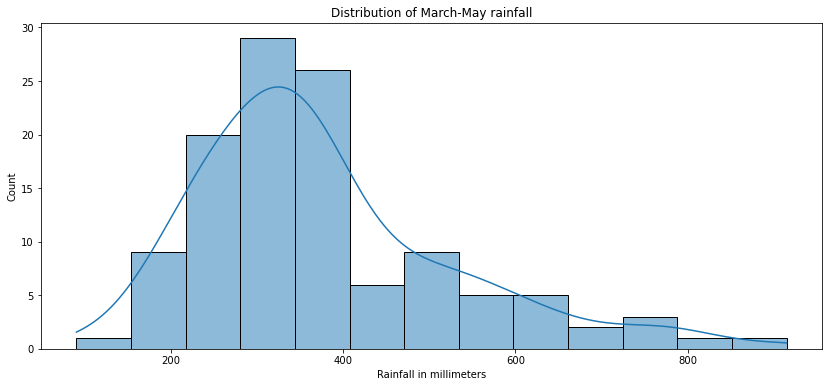

In [23]:
get_dist(df_yearly['MAM'], 'March-May rainfall')

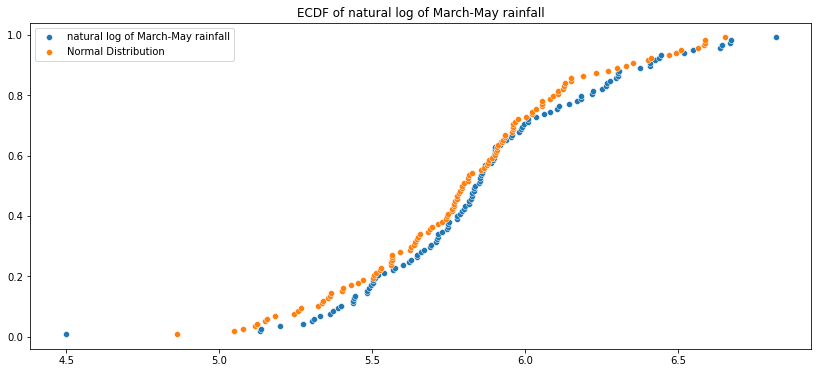

In [24]:
get_ecdf(np.log(df_yearly['MAM']), 'natural log of March-May rainfall')

Natural log of March-May data may be close to being normally distributed

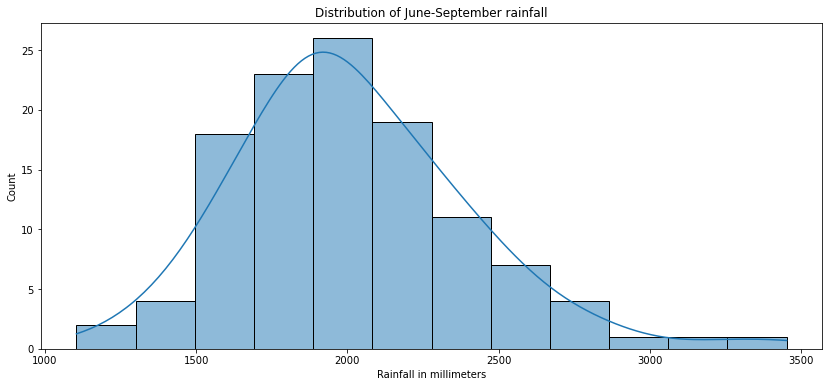

In [25]:
get_dist(df_yearly['JJAS'], 'June-September rainfall')

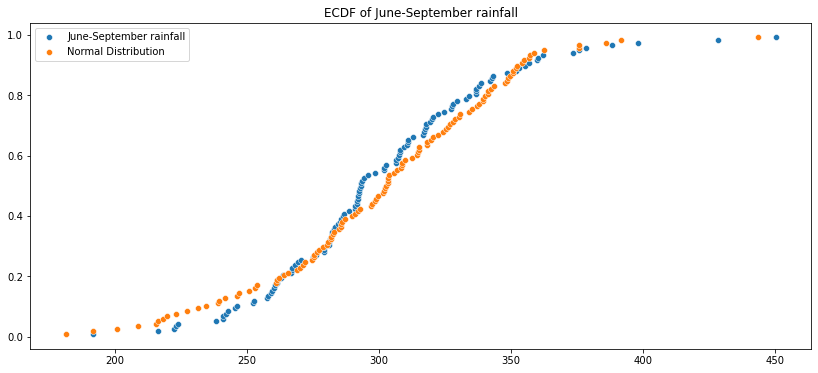

In [26]:
get_ecdf(df_yearly['JJAS']**0.75, 'June-September rainfall')

June-September data can be manipulated to mirror normal distribution

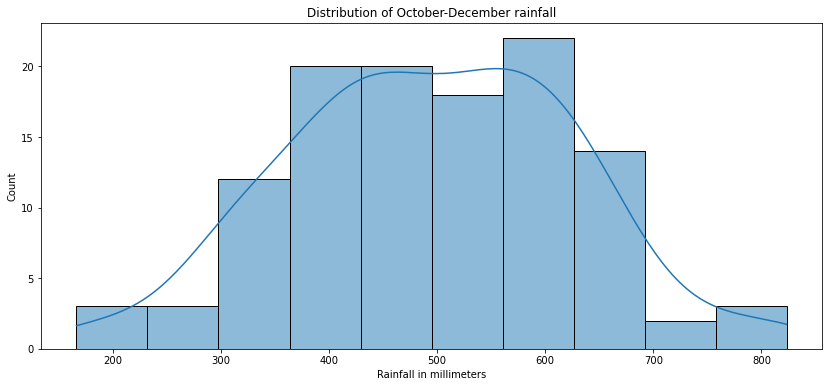

In [27]:
get_dist(df_yearly['OND'], 'October-December rainfall')

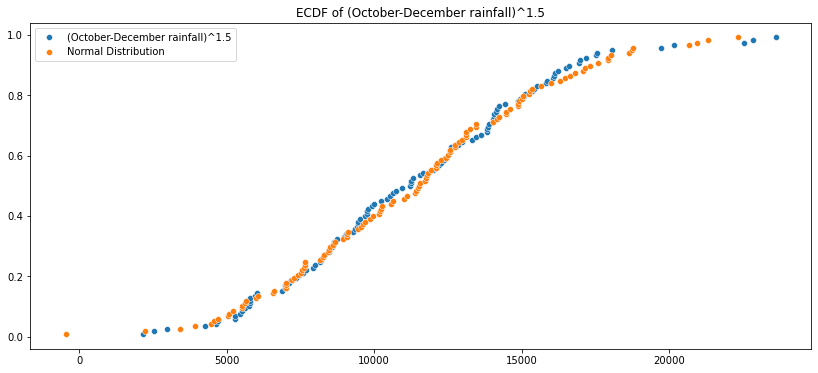

In [28]:
get_ecdf(df_yearly['OND']**1.5, '(October-December rainfall)^1.5')

Takeaway:
- Monthly rainfall is heavily influenced by months (or seasons)
- Most of the yearly and seasonal data can be manipulated to approximately fit normal distribution 

## Multi-variable analysis

<AxesSubplot:>

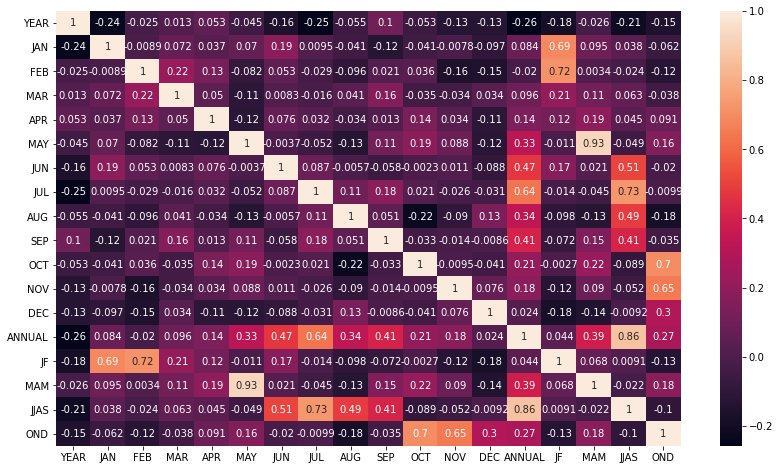

In [29]:
# Heatmap of correlation between varaiables
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)

Takeaway:
- Year has a weak, negative correlation with annual amount (total and most of the months)
- Annual, seasonal have high metrics with months they are associated with, which is not interesting
- Some weak level of correlation found in months below:
    - January rainfall has a weak, positive correlation with June rainfall amount
    - February rainfall has a weak, positive correlation with March rainfall amount
    - May rainfall has a weak, positive correlation with October rainfall amount

Text(0, 0.5, 'Rainfall in millimeters (mms)')

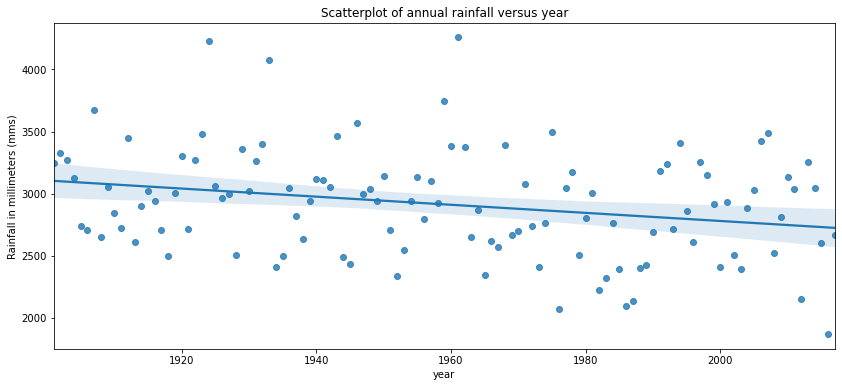

In [30]:
# Plot year versus Month
plt.figure(figsize=(14,6))
sns.regplot(x=df_yearly['YEAR'], y=df_yearly['ANNUAL'])
plt.title('Scatterplot of annual rainfall versus year')
plt.xlabel('year')
plt.ylabel('Rainfall in millimeters (mms)')

Text(0, 0.5, 'Rainfall in millimeters (mms)')

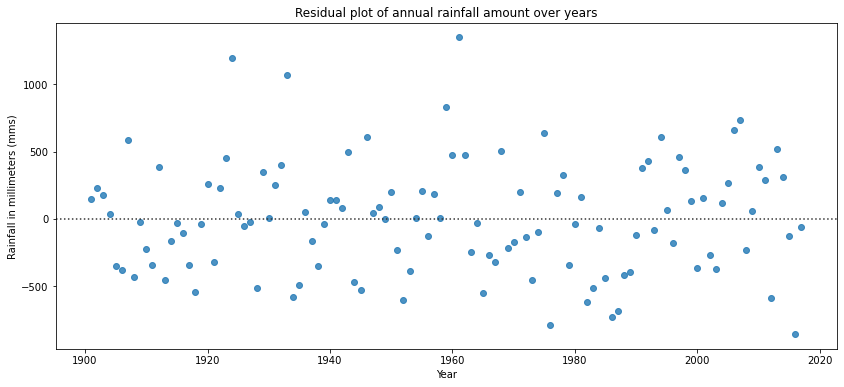

In [31]:
plt.figure(figsize=(14,6))
sns.residplot(x=df_yearly['YEAR'], y=df_yearly['ANNUAL'], order=1)
plt.title('Residual plot of annual rainfall amount over years')
plt.xlabel('Year')
plt.ylabel('Rainfall in millimeters (mms)')

In [32]:
# Regression
formula = 'ANNUAL ~ YEAR'
model = ols(formula=formula, data=df_yearly)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ANNUAL   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.143
Date:                Tue, 20 Apr 2021   Prob (F-statistic):            0.00513
Time:                        13:49:22   Log-Likelihood:                -871.05
No. Observations:                 117   AIC:                             1746.
Df Residuals:                     115   BIC:                             1752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9304.9733   2239.828      4.154      0.0

Takeaway:
- Low value of R-squared (0.066) suggest that very little proportion of variance is explained by year alone
    - We may need to locate additional information that can be used to explain additional variance
- We can say with 95% confidence that annual rain amount has been reducing as years go on
- In average, annual rainfall amount in Kerala has been decreasing by 3.26mm per year


## Conclusion
- Unfortunately, only plausible conclusion that can be made from initial exploration of the data is that yearly annual amount has been decreasing at a slow rate.
- We may need to look for additional data source to locate and explain unexplained variance. Some potential data that can be used to explain the variance may include:
    - Population (Did human settlement/activity correlated with )
    - Agriculatural
    - Temperature